In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime
from citipy import citipy
import json

from config import weather_api_key

from datetime import datetime
from scipy.stats import linregress

import timeit  # to check how long a code or function takes to run

In [6]:
# Create set of 2,000 latitudes and longitudes

lats = np.random.uniform(-90, 90, 2000)
lngs = np.random.uniform(-180, 180, 2000)

coordinates = list(zip(lats,lngs))
coordinates

[(62.21520181245705, 134.3889833528218),
 (-79.01309702124816, 143.86530431752135),
 (-79.76218403787769, -82.22132976670198),
 (-5.771862367336695, -106.50389661282927),
 (-32.071893443249216, 137.93311059673823),
 (-13.196175628570344, 97.92302212518922),
 (88.64981733902911, -43.58508392077246),
 (84.99416584585447, 104.52494187361071),
 (-0.7606660871767588, 72.40462041181297),
 (32.044967870295025, -147.58587489679317),
 (-8.874673344487505, 45.497291253127884),
 (-63.09271677558714, 164.93164473269496),
 (15.820479484400124, 116.05137243897923),
 (69.10954311267935, 57.362992120828665),
 (26.329326521179425, 104.5848686199974),
 (-49.151535467130515, 114.04049249532795),
 (4.59083599901021, -127.12280881137359),
 (-18.748027133324044, -137.12854763205002),
 (-89.0409718611331, -147.13192043056415),
 (84.63794924560713, 34.058693045686255),
 (88.82135805560077, 178.6680522535429),
 (-77.19142834831953, 169.7676261418851),
 (15.741081782109106, -127.62146022305888),
 (-22.254809891

In [7]:
# Initialize cities list
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

745

In [8]:
cities

['khandyga',
 'hobart',
 'ushuaia',
 'puerto ayora',
 'port augusta',
 'bengkulu',
 'upernavik',
 'khatanga',
 'hithadhoo',
 'kahului',
 'mitsamiouli',
 'bluff',
 'aloleng',
 'usinsk',
 'rongcheng',
 'albany',
 'atuona',
 'rikitea',
 'mataura',
 'vardo',
 'leningradskiy',
 'guerrero negro',
 'avarua',
 'ilulissat',
 'tiksi',
 'belushya guba',
 'nemuro',
 'kapaa',
 'punta arenas',
 'macamic',
 'mahebourg',
 'barrow',
 'morant bay',
 'dikson',
 'amderma',
 'thompson',
 'taolanaro',
 'castro',
 'barbastro',
 'hobyo',
 'borogontsy',
 'tsihombe',
 'vao',
 'abu samrah',
 'busselton',
 'lebu',
 'igrim',
 'antofagasta',
 'louisbourg',
 'samarai',
 'new norfolk',
 'agadez',
 'jamestown',
 'hermanus',
 'avallon',
 'karavayevo',
 'pueblo nuevo',
 'vostok',
 'rio grande',
 'kenai',
 'severo-kurilsk',
 'san patricio',
 'nikolskoye',
 'coquimbo',
 'shelburne',
 'tawkar',
 'bur gabo',
 'cape town',
 'gazi',
 'qaanaaq',
 'grand centre',
 'verkhniy avzyan',
 'korla',
 'kontagora',
 'namanga',
 'jizan',

In [9]:
# Starting URL for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"


# List of City Data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create URL for each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1


    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_desc = city_weather['weather']['description']

        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          'Current Description': city_desc
                        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khandyga
City not found. Skipping...
Processing Record 2 of Set 1 | hobart
City not found. Skipping...
Processing Record 3 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 4 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 5 of Set 1 | port augusta
City not found. Skipping...
Processing Record 6 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 7 of Set 1 | upernavik
City not found. Skipping...
Processing Record 8 of Set 1 | khatanga
City not found. Skipping...
Processing Record 9 of Set 1 | hithadhoo
City not found. Skipping...
Processing Record 10 of Set 1 | kahului
City not found. Skipping...
Processing Record 11 of Set 1 | mitsamiouli
City not found. Skipping...
Processing Record 12 of Set 1 | bluff
City not found. Skipping...
Processing Record 13 of Set 1 | aloleng
City not found. Skipping...
Processing Record 14 of Set 1 | usinsk
City not

In [4]:
city_data

[]

In [12]:
# Convert array of JSON into Pandas
city_data_df = pd.DataFrame(city_data)


# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Windspeed     561
Country       561
Date          561
dtype: int64

In [13]:
# Display the city Data Frame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,constitucion,-35.3333,-72.4167,53.87,68,5,6.85,CL,1654783997
1,sumbe,-11.2061,13.8437,80.02,60,40,10.36,AO,1654784379
2,lata,40.1629,-8.3327,83.07,29,14,9.62,PT,1654784379
3,kamenz,51.2680,14.0937,69.28,61,86,8.59,DE,1654783998
4,vagamo,61.8751,9.0967,65.23,51,95,4.14,NO,1654783998


In [ ]:
new_column_order = ['City', 'Country', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Wind Speed', 'Current Description']

Plotting the Data

Latitude vs. Temperature

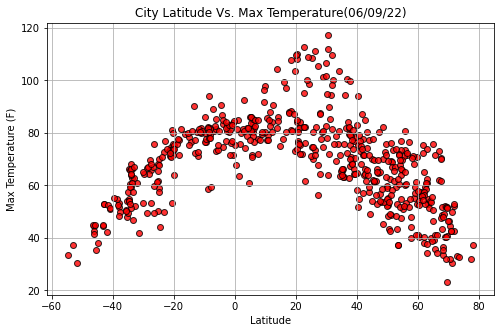

In [18]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 5))
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o", c='red', alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather_Database/Fig1.png")

# Show plot
plt.show()

Latitude vs. Humidity

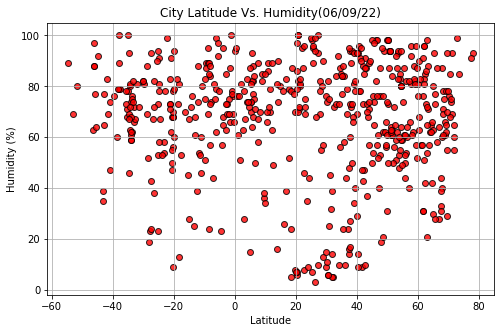

In [21]:
# Build scatter plot for latitude vs. Humidity
plt.figure(figsize=(8, 5))
plt.scatter(lats, humidity, edgecolor="black", linewidth=1, marker="o", c='red', alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("Weather_Database/Fig2.png")

# Show plot
plt.show()

Latitude vs. Cloudiness

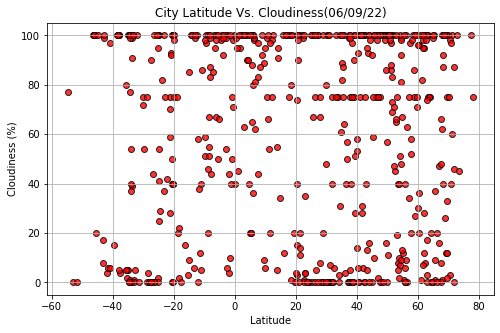

In [22]:
# Build scatter plot for latitude vs. Cloudiness
plt.figure(figsize=(8, 5))
plt.scatter(lats, cloudiness, edgecolor="black", linewidth=1, marker="o", c='red', alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("Weather_Database/Fig3.png")

# Show plot
plt.show()

Latitude vs. Wind Speed

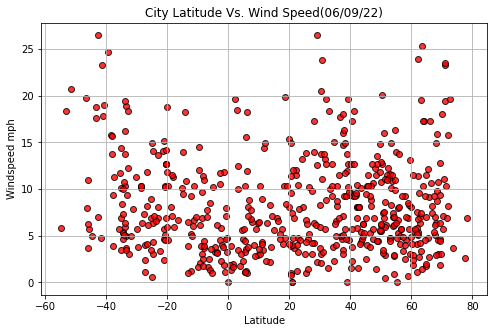

In [23]:
# Build scatter plot for latitude vs. Windspeed
plt.figure(figsize=(8, 5))
plt.scatter(lats, wind_speed, edgecolor="black", linewidth=1, marker="o", c='red', alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("Weather_Database/Fig4.png")

# Show plot
plt.show()

Linear Regression

In [28]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

Create Northern and Southern Hemisphere DataFrames

In [29]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

Maximum Temp vs. Latitude Linear Regression

for Northern Hemisphere

The r-squared is: -0.7116003782015393


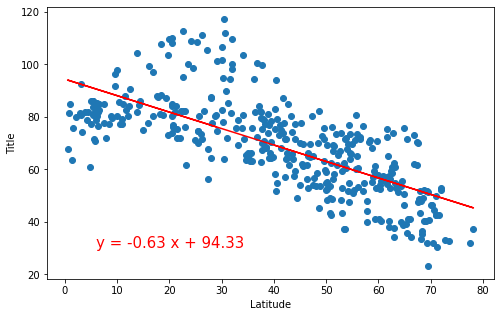

In [30]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))

for Southern Hemisphere

The r-squared is: 0.8634463322479672


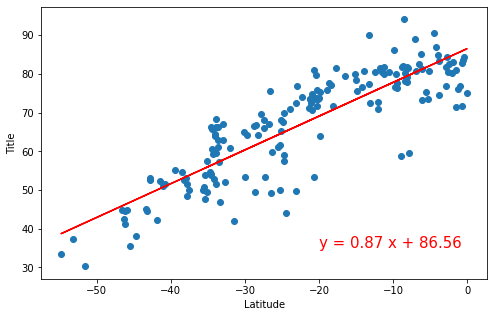

In [34]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-20,35))

Percent Humidity vs. Latitude Linear Regression

for Northern Hemisphere

The r-squared is: 0.046408034729136405


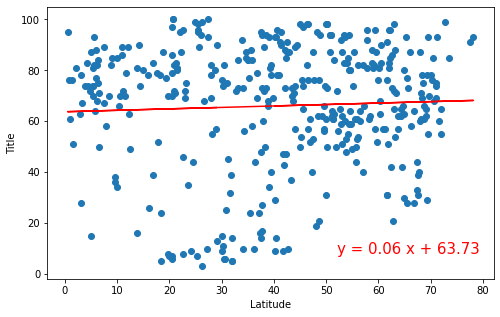

In [38]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (52,8))

for Southern Hemisphere

The r-squared is: -0.00985878984070686


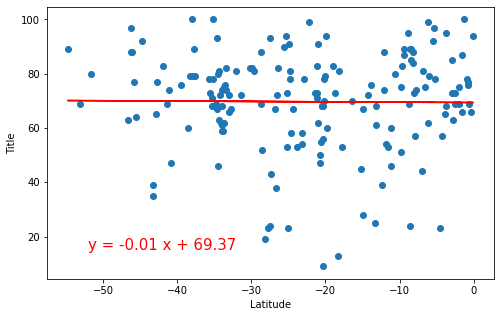

In [45]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-52,15))

Percent Cloudiness vs. Latitude Linear Regression

for Northern Hemisphere

In [ ]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

Southern Hemisphere

In [ ]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

Wind Speed (mph) vs. Latitude Linear Regression

Northern Hemisphere

In [ ]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

for Southern Hemisphere

In [ ]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))